# Contents
1. EDA
2. Data Engineer
3. Algorithms
4. Metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math

%matplotlib inline
sns.set()

## 1. EDA
### Load Data

In [2]:
df_train_trans = pd.read_csv("../dataset/train_transaction.csv")
df_test_trans = pd.read_csv("../dataset/test_transaction.csv")
print("df_train_trans.shape:", df_train_trans.shape)
print("df_test_trans.shape:", df_test_trans.shape)

df_train_id = pd.read_csv("../dataset/train_identity.csv")
df_test_id = pd.read_csv("../dataset/test_identity.csv")
print("df_train_id.shape:", df_train_id.shape)
print("df_test_id.shape:", df_test_id.shape)

df_train_trans.shape: (590540, 394)
df_test_trans.shape: (506691, 393)
df_train_id.shape: (144233, 41)
df_test_id.shape: (141907, 41)


In [4]:
df_train_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_train_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


## Data Exploration - Univariate
* exploration on first 17 columns

/Users/peteryoung/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


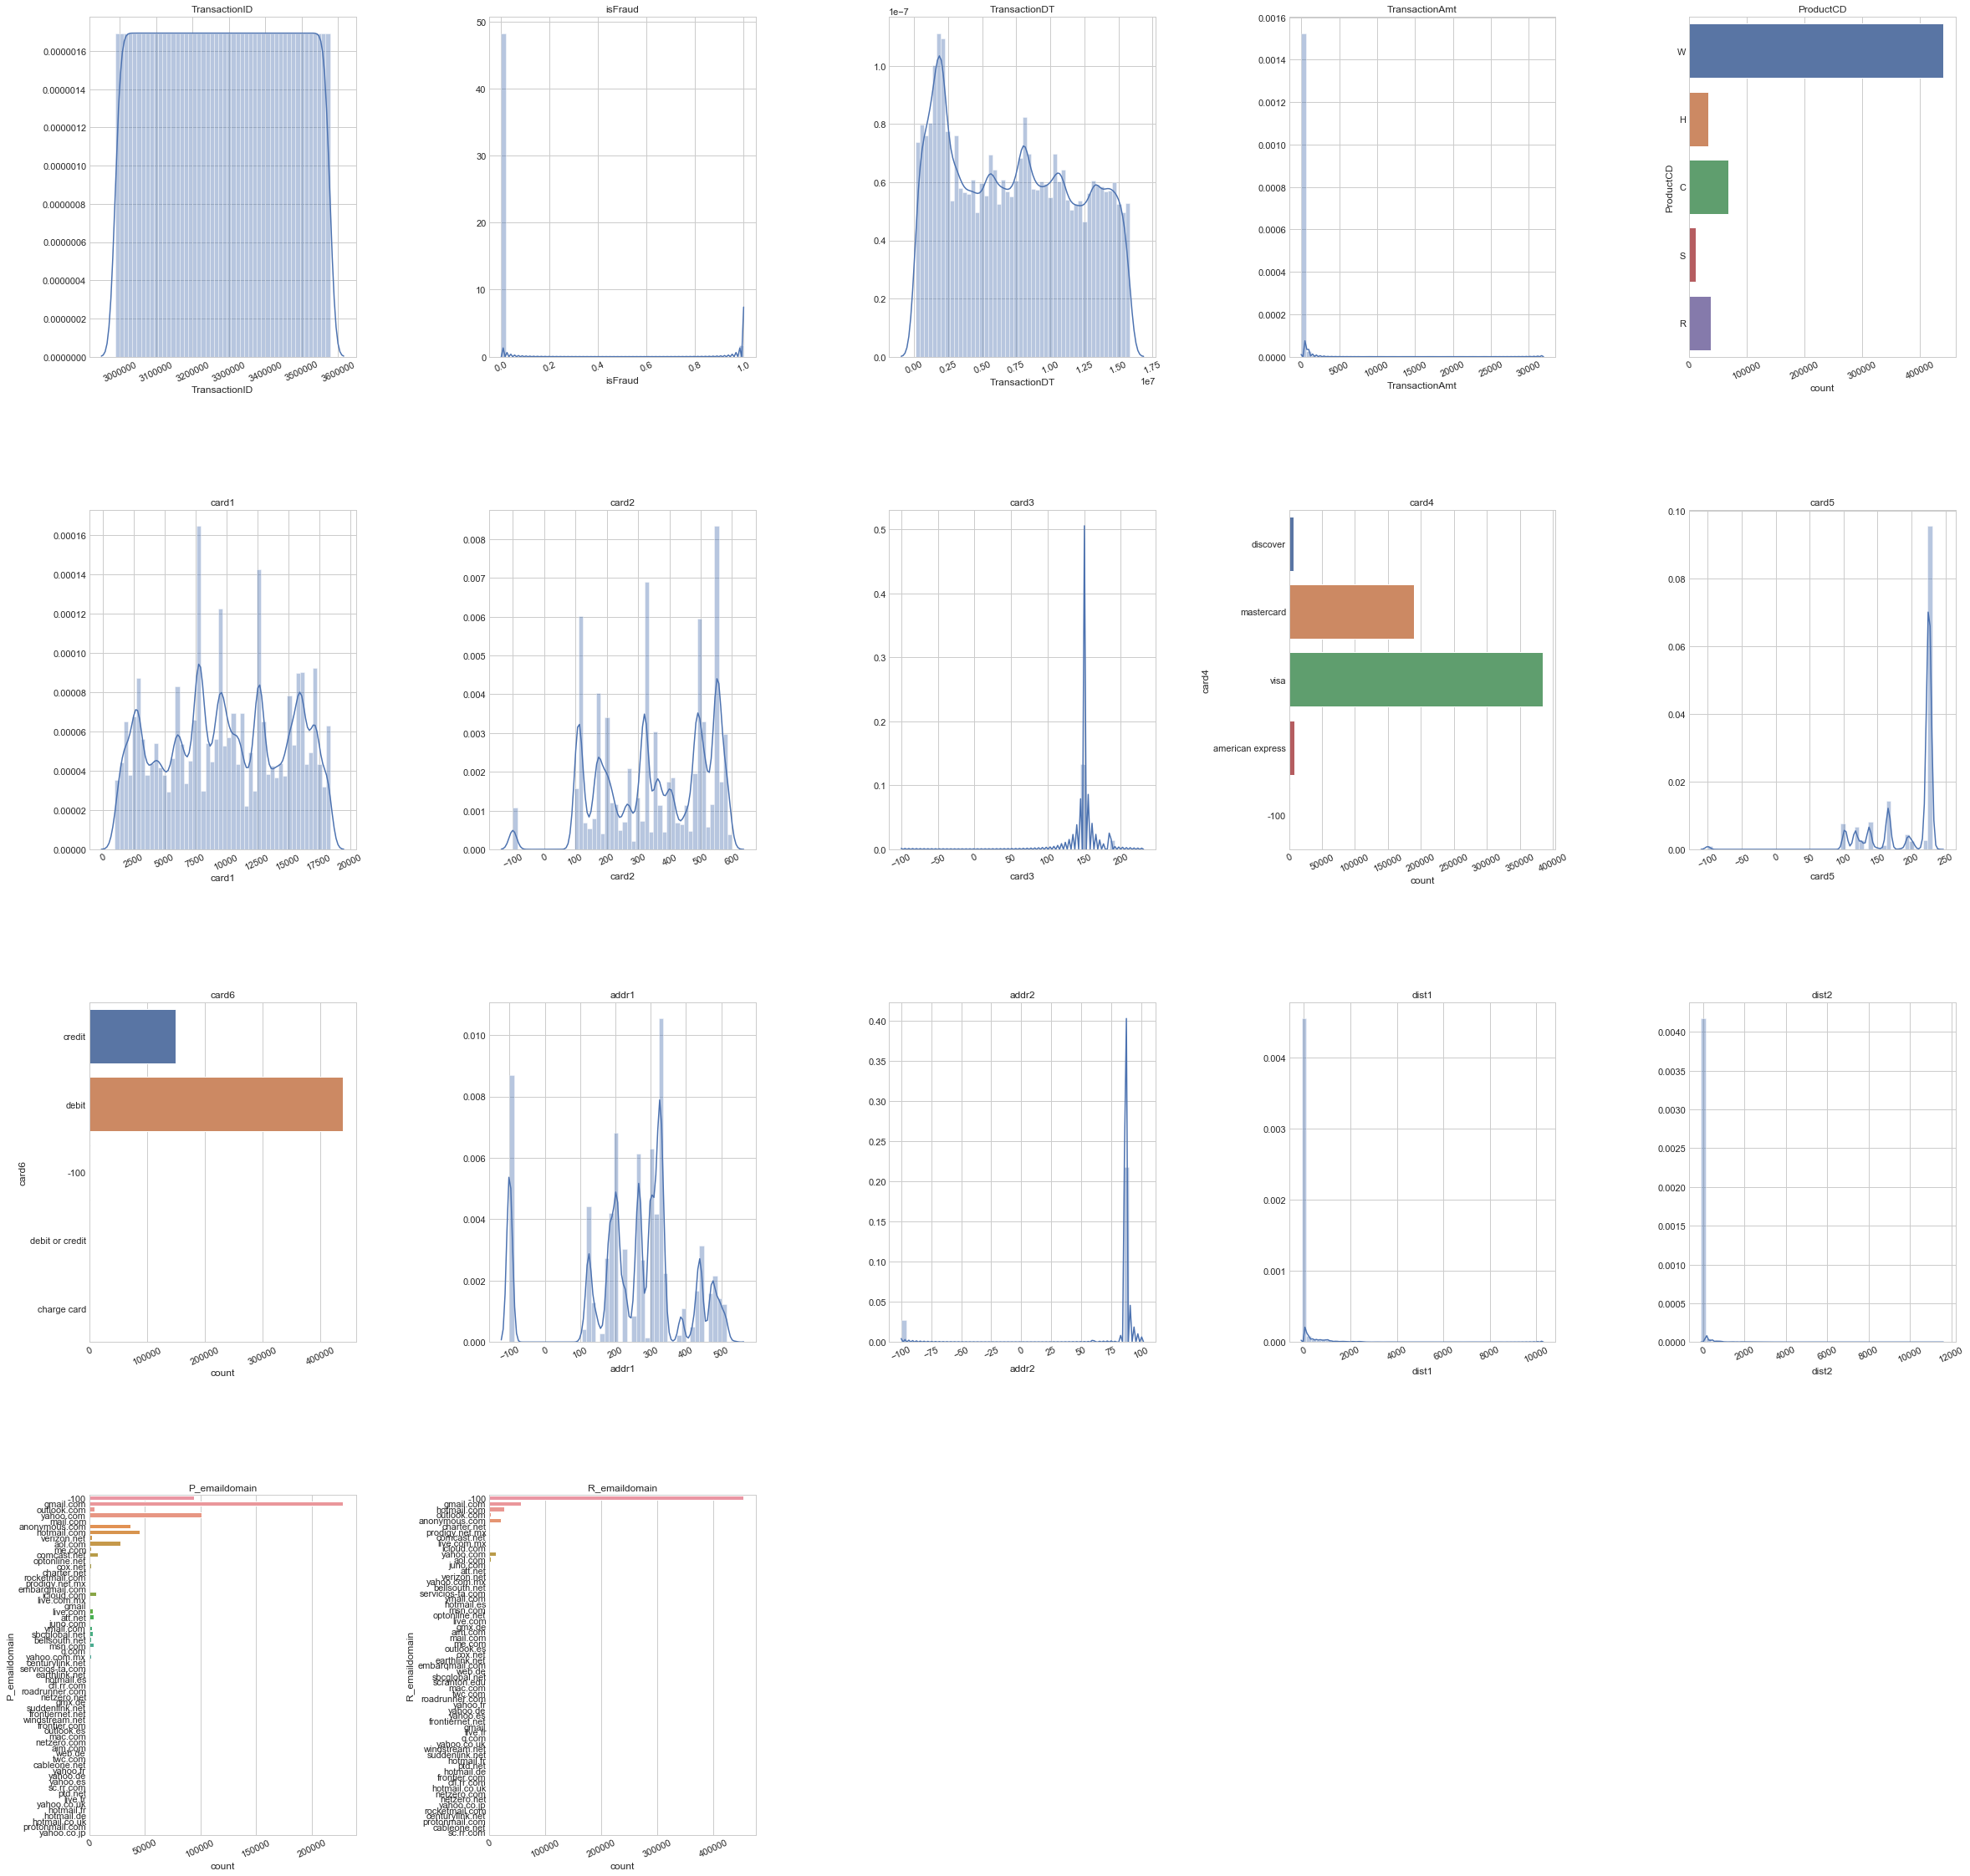

In [18]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use("seaborn-whitegrid")
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            # get categorical name of features
            substrings = [s.get_text() for s in g.get_yticklabels()]
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column], kde=True)
            plt.xticks(rotation=25)
            
plot_distribution(df_train_trans.iloc[:,:17].fillna(-100), cols=5, width=40, height=40, hspace=0.45, wspace=0.5)

### Check out data types, missing values

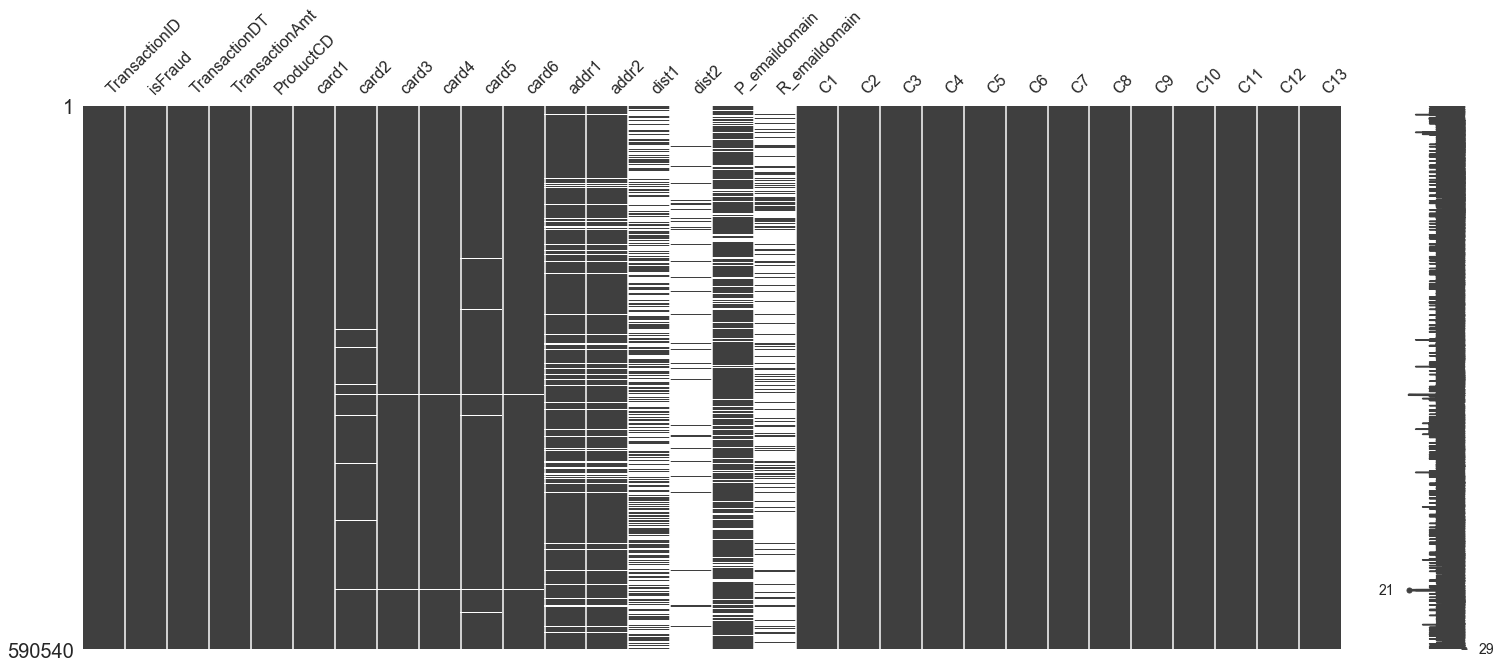

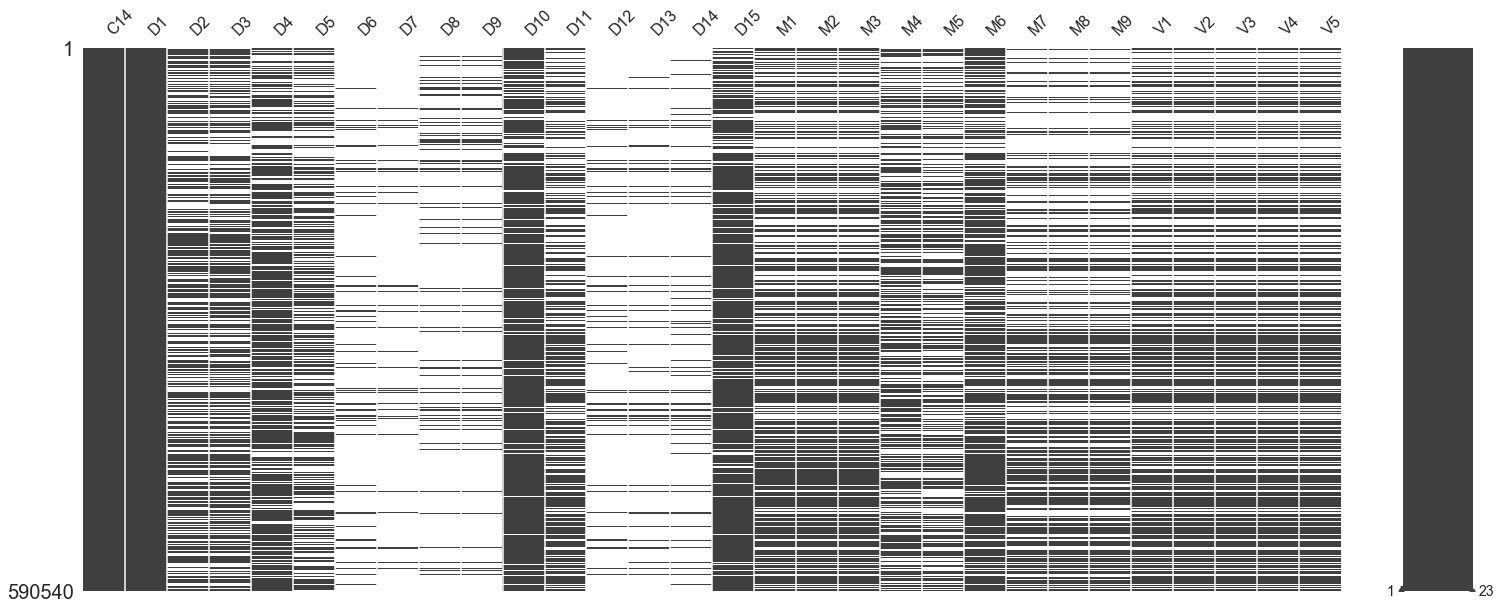

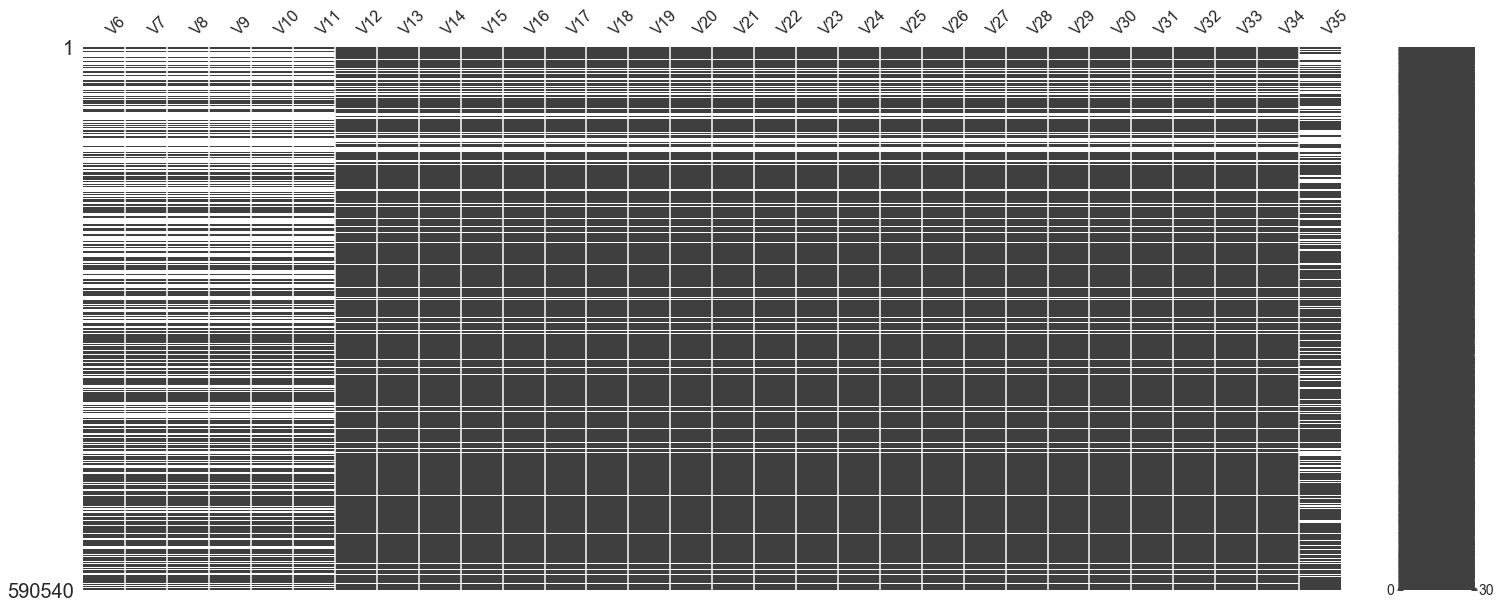

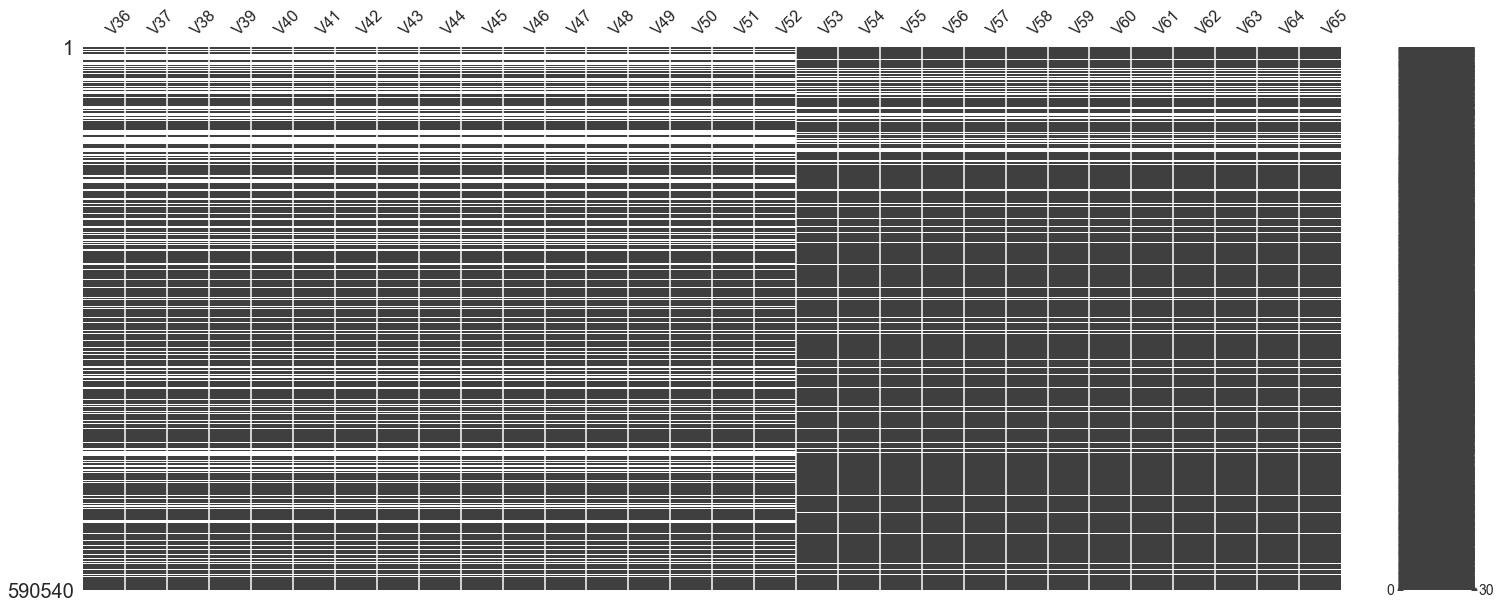

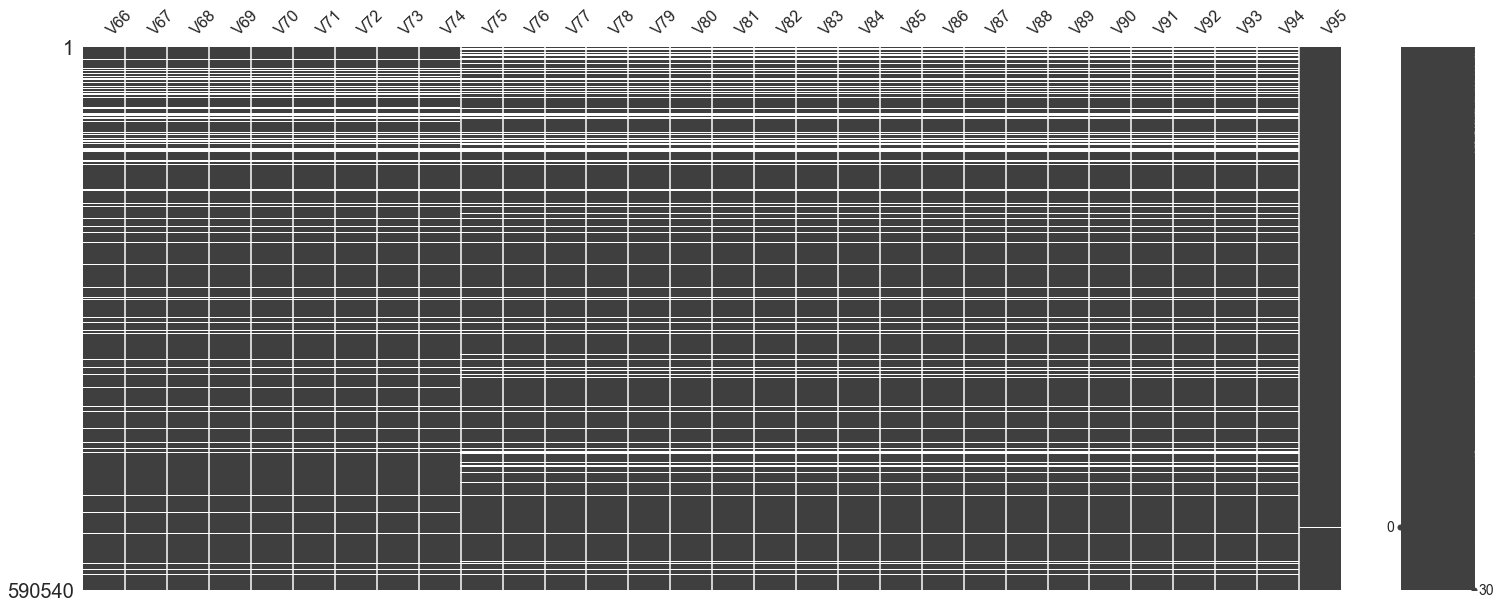

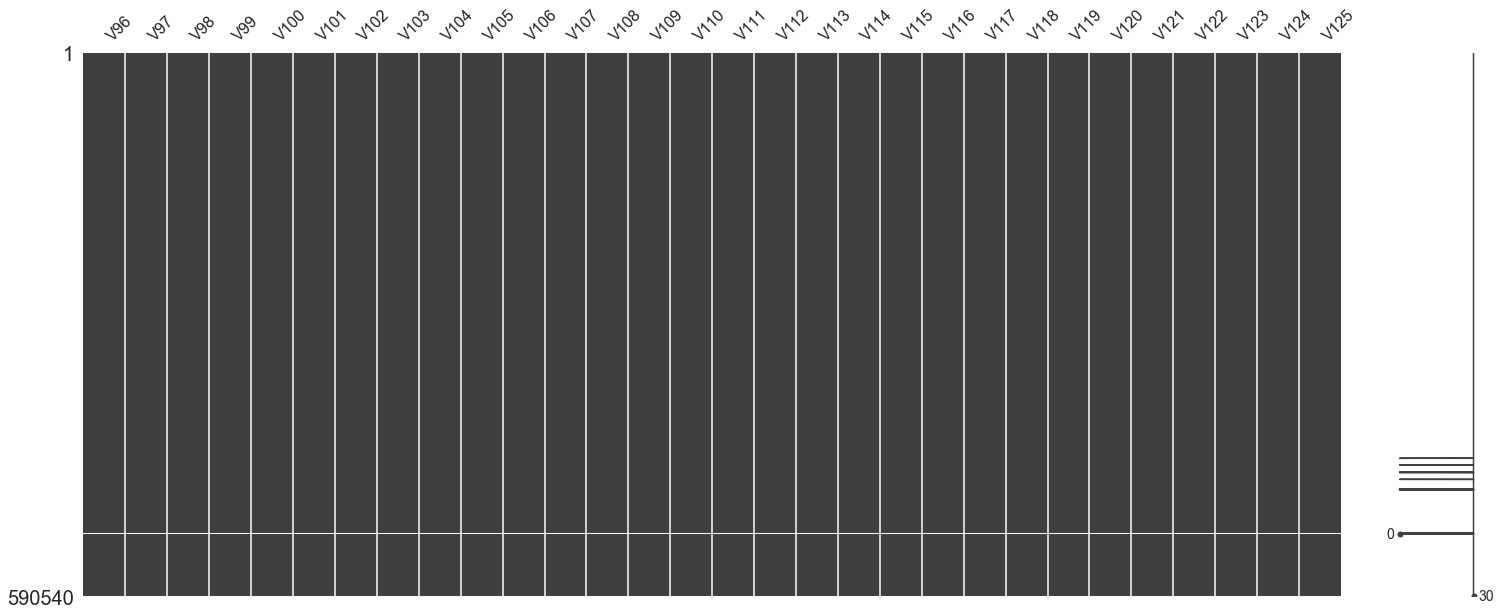

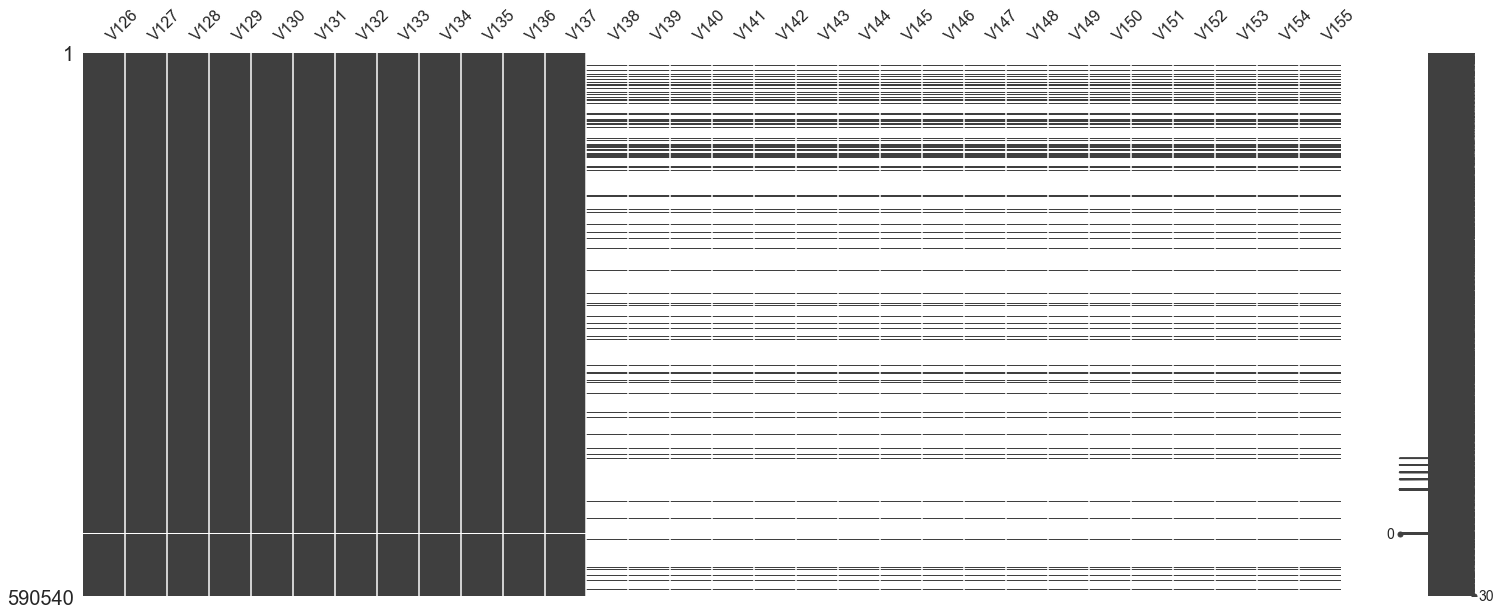

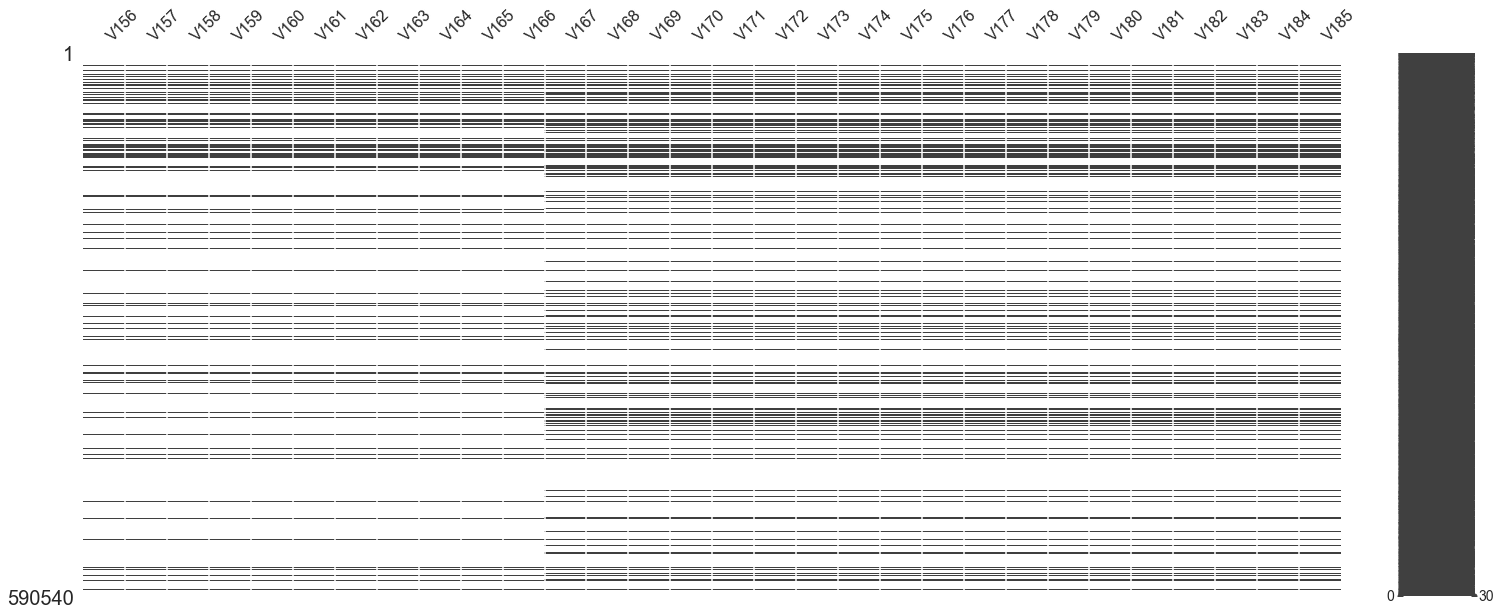

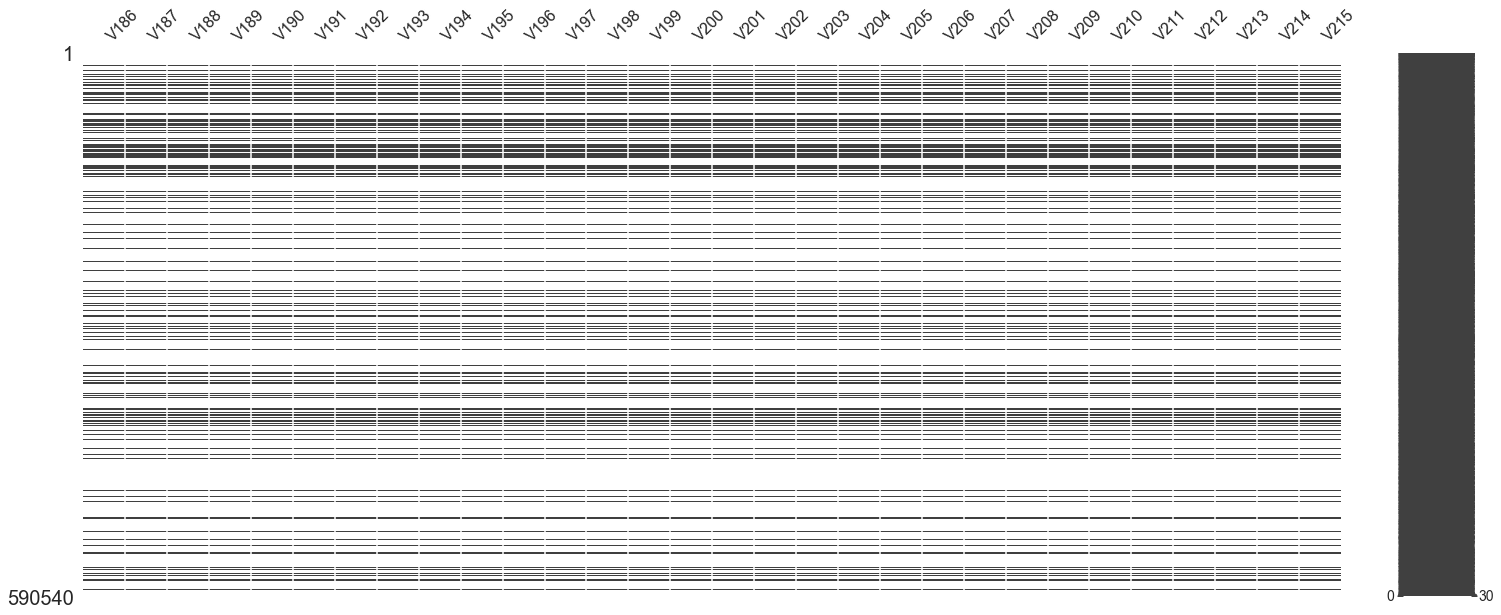

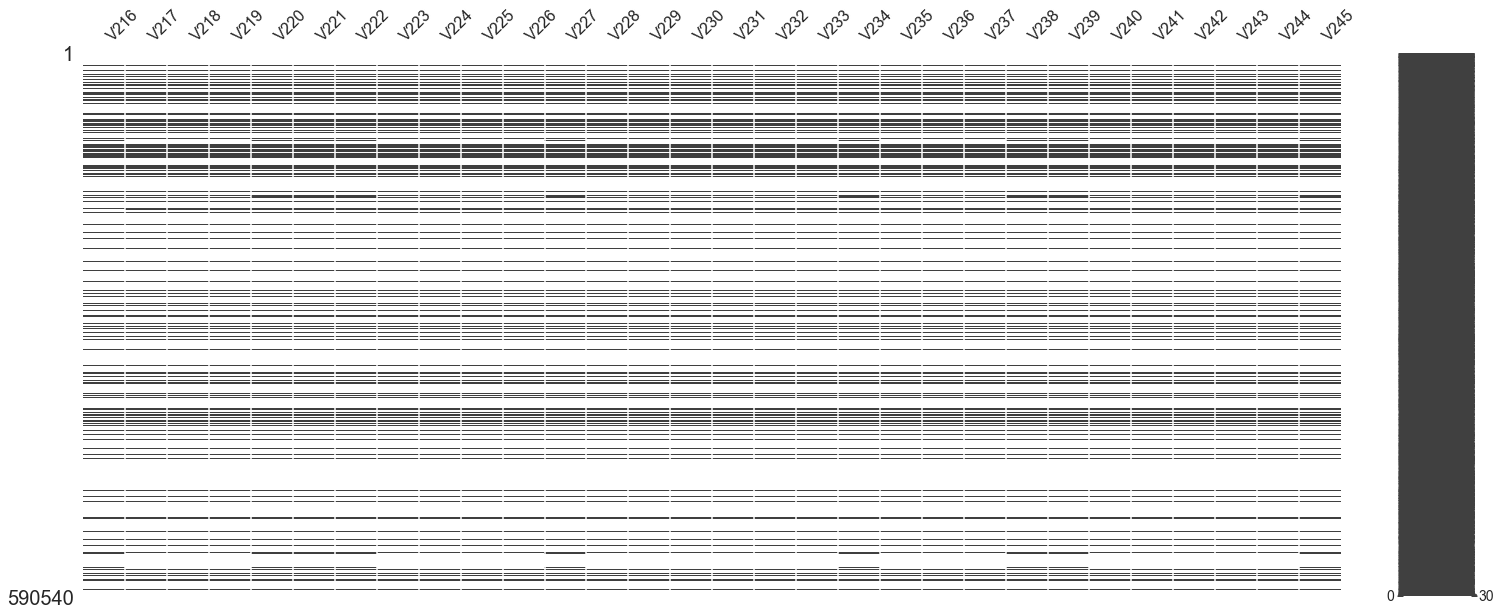

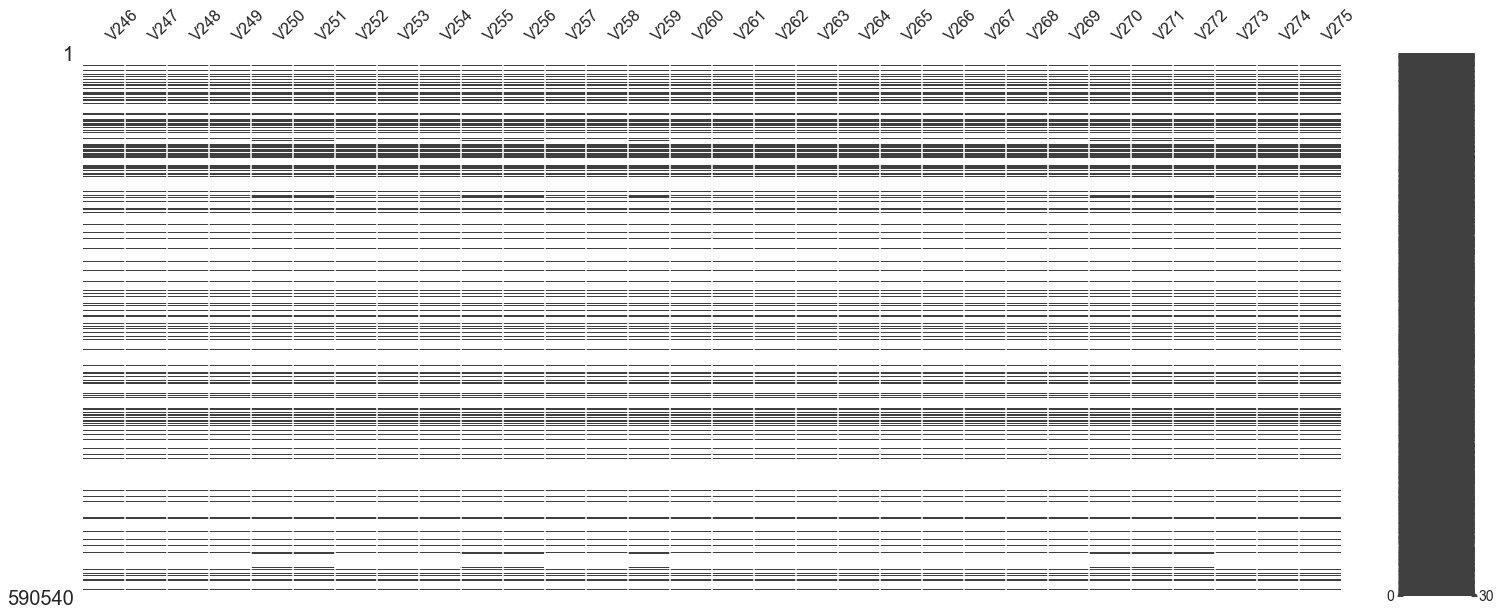

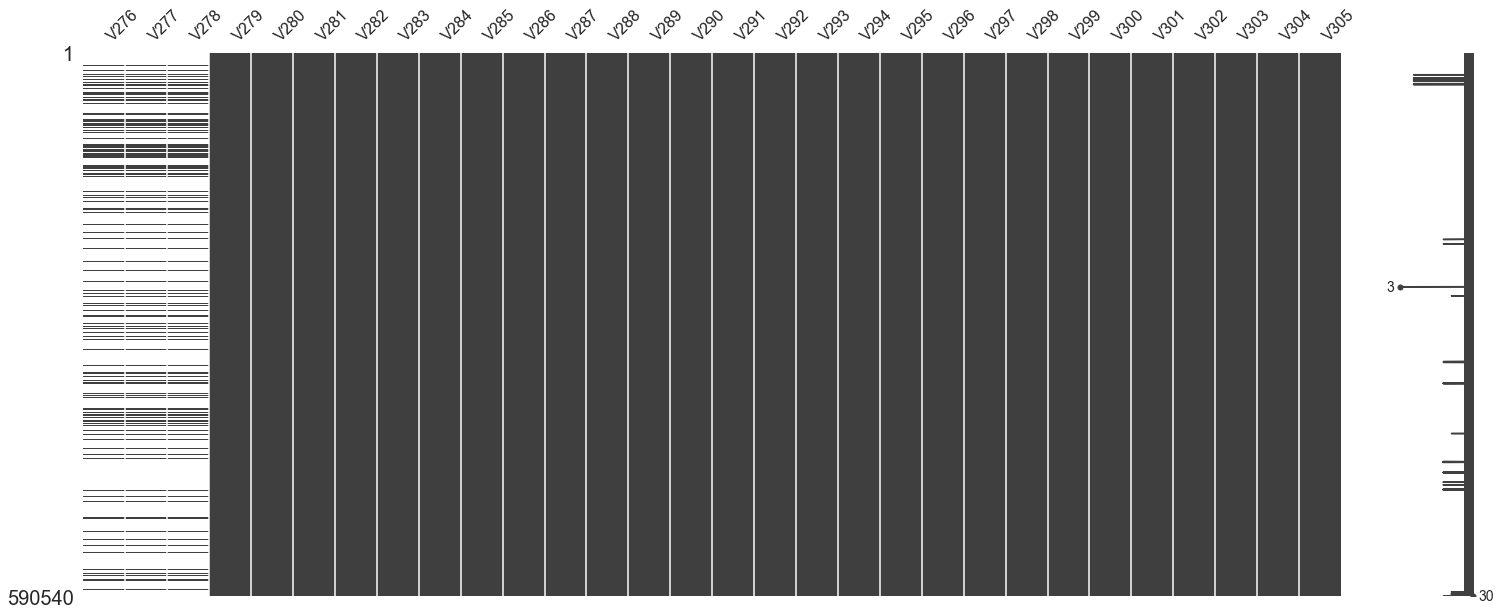

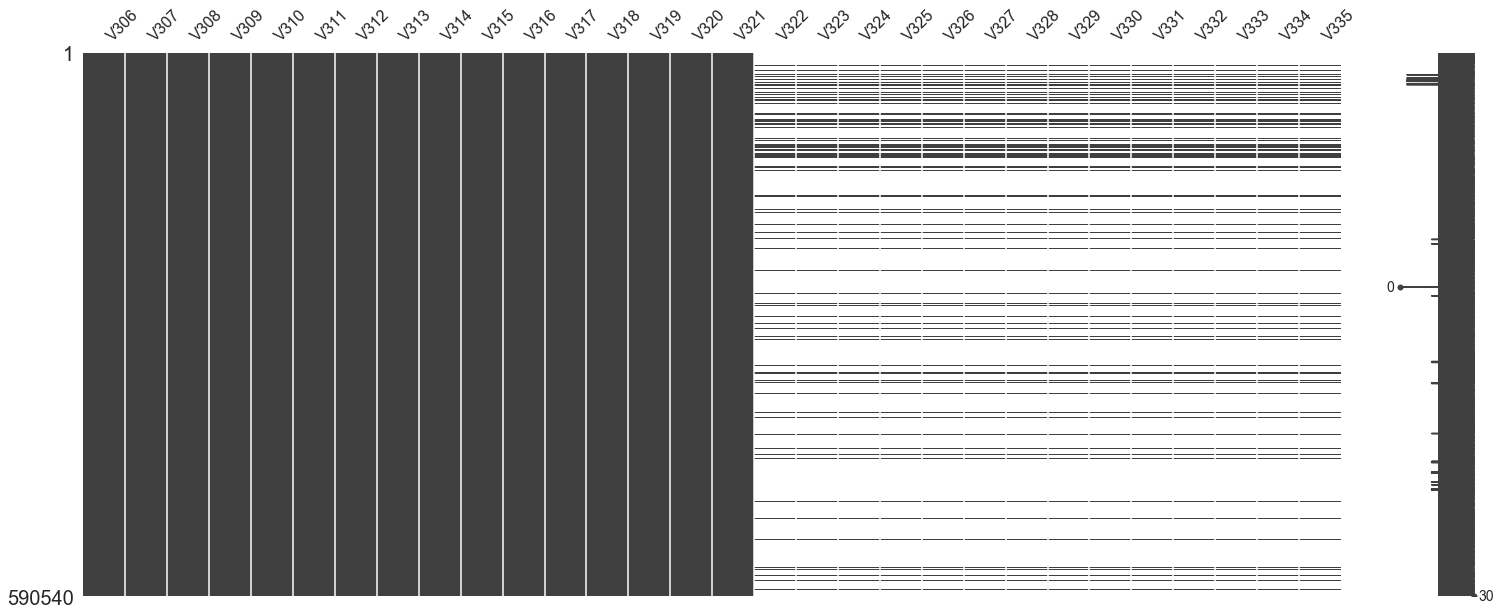

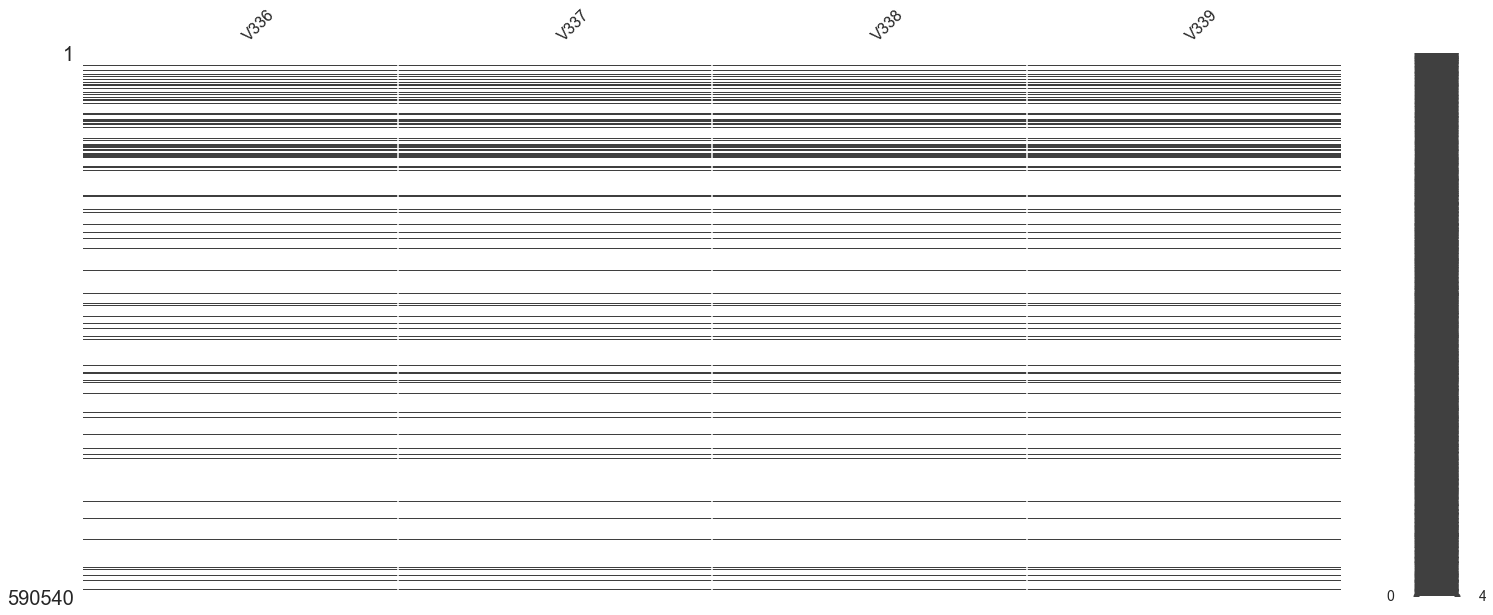

In [8]:
for i in range(14):
    msno.matrix(df_train_trans.iloc[:,i*30:(i+1)*30])

In [14]:
df_train_trans.iloc[:15,:17]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,36.0,NaN,gmail.com,NaN
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,0.0,NaN,yahoo.com,NaN
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,NaN,NaN,mail.com,NaN
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,NaN,NaN,anonymous.com,NaN
9,2987009,0,86536,117.000,W,17399,111.0,150.0,mastercard,224.0,debit,204.0,87.0,19.0,NaN,yahoo.com,NaN


### Missing value exploration on first 17 columns
* lots of missing value: [#14 dist1, #15 dist2, #17 R_emaildomain]
* medium of missing value: [#16 P_emaildomain]
* little of missing value: [#7 card2, #8 card3, #9 card4, #10 card5, #11 card6, #12 addr1, #13 addr2, ]

In [5]:
print(df_train_trans.iloc[:,:17].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 17 columns):
TransactionID     590540 non-null int64
isFraud           590540 non-null int64
TransactionDT     590540 non-null int64
TransactionAmt    590540 non-null float64
ProductCD         590540 non-null object
card1             590540 non-null int64
card2             581607 non-null float64
card3             588975 non-null float64
card4             588963 non-null object
card5             586281 non-null float64
card6             588969 non-null object
addr1             524834 non-null float64
addr2             524834 non-null float64
dist1             238269 non-null float64
dist2             37627 non-null float64
P_emaildomain     496084 non-null object
R_emaildomain     137291 non-null object
dtypes: float64(8), int64(4), object(5)
memory usage: 76.6+ MB
None


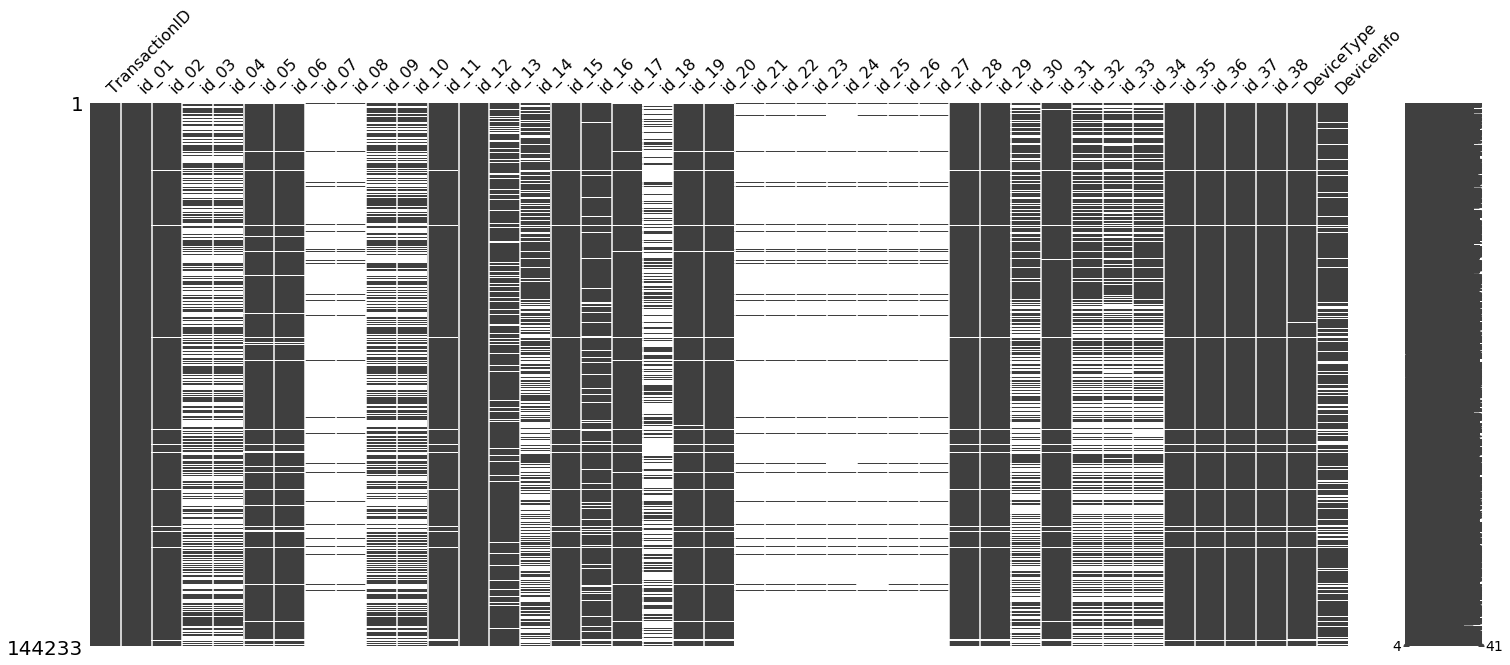

In [6]:
msno.matrix(df_train_id)

total number: 590540
is fraud: 20663,  0.035
is not fraud: 569877,  0.965


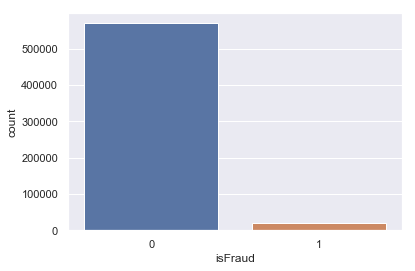

In [47]:
sns.countplot(x="isFraud", data=df_train_trans)
print("total number:", df_train_trans.shape[0])
print("is fraud: {0},  {1:.3f}".format(df_train_trans[df_train_trans.isFraud == 1].shape[0], df_train_trans[df_train_trans.isFraud == 1].shape[0] / df_train_trans.shape[0]))
print("is not fraud: {0},  {1:.3f}".format(df_train_trans[df_train_trans.isFraud == 0].shape[0], df_train_trans[df_train_trans.isFraud == 0].shape[0] / df_train_trans.shape[0]))

## Bi-variate Analysis

In [ ]:
def plot_bivariate_bar():
    